In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [2]:
data=pd.read_csv('diabetes_data_upload.csv')

In [3]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


<AxesSubplot:xlabel='Age'>

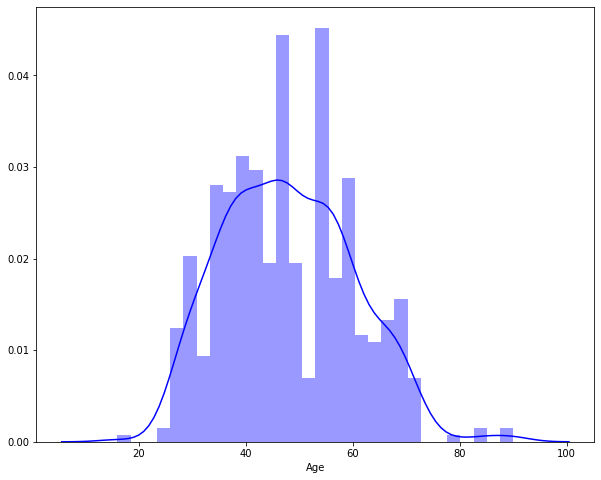

In [6]:
plt.figure(figsize=(10,8))
sns.distplot(data['Age'],bins=30,kde=True, color='blue')

<AxesSubplot:xlabel='class', ylabel='count'>

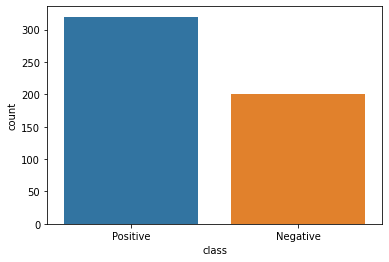

In [7]:
sns.countplot(x='class', data=data)

In [8]:
data['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [9]:
data['Gender'].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

In [10]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [11]:
data=pd.get_dummies(data, drop_first=True)

In [12]:
data

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=data.drop('class_Positive',axis=1).values
y=data['class_Positive'].values

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Using RandomForest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc=RandomForestClassifier(n_estimators=100)

In [63]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [64]:
predictions=rfc.predict(X_test)

In [65]:
print(confusion_matrix(y_test, predictions))

[[37  1]
 [ 0 66]]


In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.99      1.00      0.99        66

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [67]:
data.tail(8)

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
512,43,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
513,62,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1
514,54,0,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
rfc.predict([[18,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

array([1], dtype=uint8)

In [69]:
joblib.dump(rfc, 'RandomForest_model.pkl')

['RandomForest_model.pkl']

In [70]:
model=joblib.load('RandomForest_model.pkl')

In [71]:
model.predict([[64,0,0,0,1,1,1,0,0,1,1,1,0,0,1,1]])

array([1], dtype=uint8)

# Using KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn=KNeighborsClassifier(n_neighbors=1)

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
pred=knn.predict(X_test)

In [38]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.95      0.94      0.95        66

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104

[[35  3]
 [ 4 62]]


In [39]:
error_rate=[]

for i in range(1,100):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'error rate')

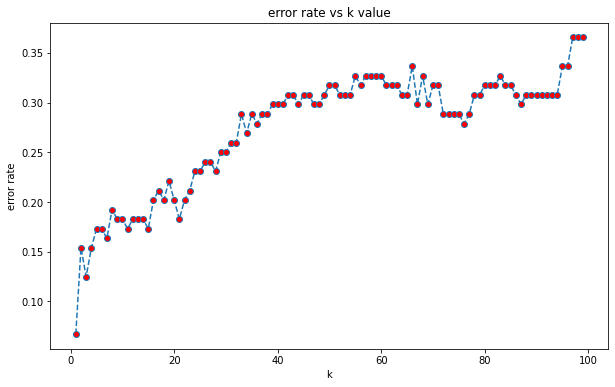

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,linestyle='--',marker='o',markerfacecolor='red')
plt.title('error rate vs k value')
plt.xlabel('k')
plt.ylabel('error rate')

In [41]:
joblib.dump(knn, 'KNearestNeighbor_model.pkl')

['KNearestNeighbor_model.pkl']

In [42]:
model=joblib.load('KNearestNeighbor_model.pkl')

In [43]:
model.predict([[45,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1]])

array([1], dtype=uint8)

# Using Naive Bayes 

In [44]:
from sklearn.naive_bayes import BernoulliNB

In [45]:
bnb=BernoulliNB()

In [46]:
bnb.fit(X_train,y_train)

BernoulliNB()

In [47]:
predictions=bnb.predict(X_test)

In [48]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        38
           1       0.90      0.91      0.90        66

    accuracy                           0.88       104
   macro avg       0.87      0.86      0.86       104
weighted avg       0.87      0.88      0.87       104

[[31  7]
 [ 6 60]]


In [49]:
joblib.dump(bnb, 'NaiveBayes_model.pkl')

['NaiveBayes_model.pkl']

In [50]:
bnb.predict([[15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([0], dtype=uint8)

# Using Linear Support Vector Classification(SVM)

In [51]:
from sklearn.svm import LinearSVC

In [52]:
lsvc=LinearSVC()

In [53]:
lsvc.fit(X_train,y_train)

c:\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [54]:
prediction=lsvc.predict(X_test)

In [55]:
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.05      0.10        38
           1       0.65      1.00      0.79        66

    accuracy                           0.65       104
   macro avg       0.82      0.53      0.44       104
weighted avg       0.78      0.65      0.54       104

[[ 2 36]
 [ 0 66]]


In [56]:
joblib.dump(lsvc, 'LinearSVC_model.pkl')

['LinearSVC_model.pkl']